**Lineer Regression**

Eğim (katsayı): [2.77011339]
Kesişim (sabit): [4.21509616]
Ortalama Kare Hata (MSE): 0.8065845639670531


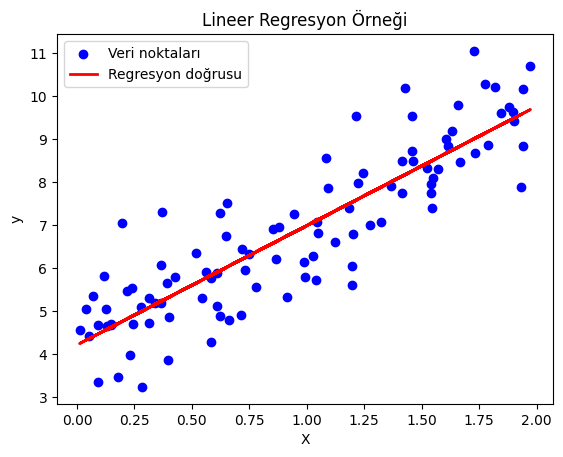

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Rastgele veri seti oluşturma
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # Bağımsız değişken
y = 4 + 3 * X + np.random.randn(100, 1)  # Bağımlı değişken (gürültü eklenmiş)

# Lineer Regresyon modelini oluşturma ve eğitme
model = LinearRegression()
model.fit(X, y)

# Modelin katsayıları (eğim ve kesişim)
print("Eğim (katsayı):", model.coef_[0])
print("Kesişim (sabit):", model.intercept_)

# Tahmin yapma
y_pred = model.predict(X)

# Ortalama Kare Hata (MSE) hesaplama
mse = mean_squared_error(y, y_pred)
print("Ortalama Kare Hata (MSE):", mse)

# Veriyi ve regresyon doğrusunu görselleştirme
plt.scatter(X, y, color='blue', label='Veri noktaları')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regresyon doğrusu')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Lineer Regresyon Örneği')
plt.legend()
plt.savefig('linear_regression_plot.png')

 **Gradient Descent**

Başlangıç x: 4.0
Son x: 3.2331251098590505e-11
Son kayıp fonksiyonu değeri (f(x)): 1.0453097976001098e-21


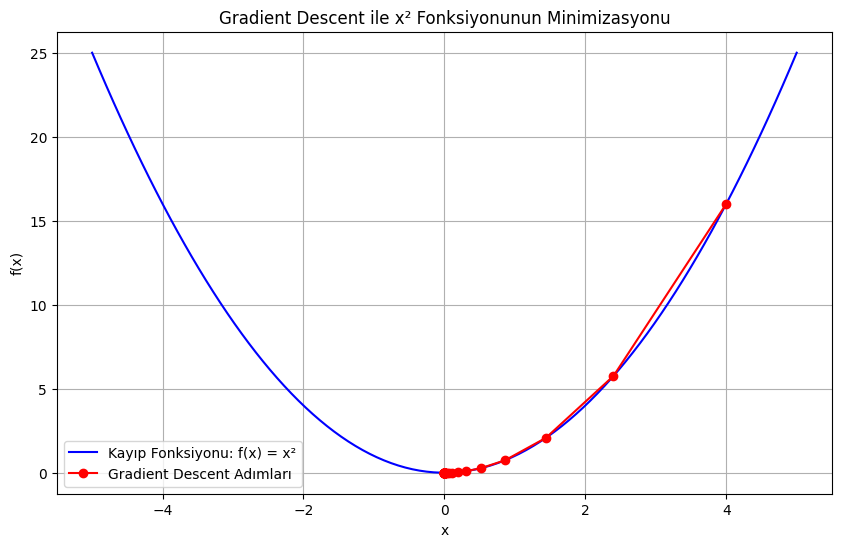

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Kayıp fonksiyonu: f(x) = x^2
def loss_function(x):
    return x**2

# Kayıp fonksiyonunun türevi (gradyan): f'(x) = 2x
def gradient(x):
    return 2 * x

# Gradient Descent parametreleri
learning_rate = 0.2  # Öğrenme oranı
n_iterations = 50    # İterasyon sayısı
x_initial = 4.0      # Başlangıç noktası

# Gradient Descent
x = x_initial
x_history = [x]  # x değerlerini kaydetmek için liste

for i in range(n_iterations):
    grad = gradient(x)  # Gradyanı hesapla
    x = x - learning_rate * grad  # x'i güncelle
    x_history.append(x)  # Yeni x'i kaydet

# Sonuçları yazdırma
print("Başlangıç x:", x_initial)
print("Son x:", x)
print("Son kayıp fonksiyonu değeri (f(x)):", loss_function(x))

# Görselleştirme
x_range = np.linspace(-5, 5, 100)
y_range = loss_function(x_range)

plt.figure(figsize=(10, 6))
plt.plot(x_range, y_range, 'b-', label='Kayıp Fonksiyonu: f(x) = x²')
plt.plot(x_history, [loss_function(x) for x in x_history], 'ro-', label='Gradient Descent Adımları')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gradient Descent ile x² Fonksiyonunun Minimizasyonu')
plt.legend()
plt.grid(True)
plt.savefig('gradient_descent_non_linear_plot.png')

**Logistic Regression**

Doğruluk Skoru: 1.0
Karışıklık Matrisi:
 [[13  0]
 [ 0  7]]


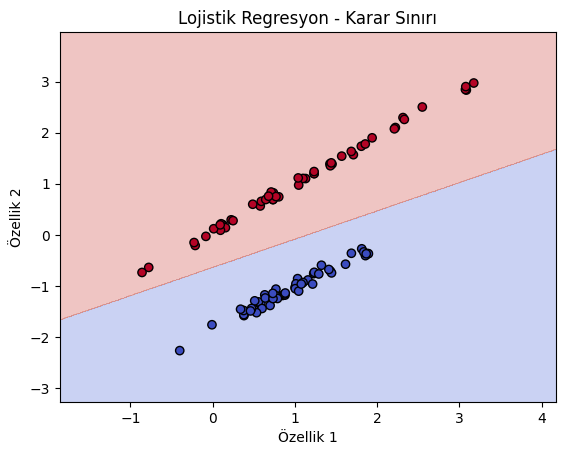

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Sentetik veri seti oluşturma
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_clusters_per_class=1,
                          n_informative=2, n_redundant=0, random_state=42)

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lojistik Regresyon modelini oluşturma ve eğitme
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = model.predict(X_test)

# Doğruluk skoru ve karışıklık matrisi
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Doğruluk Skoru:", accuracy)
print("Karışıklık Matrisi:\n", conf_matrix)

# Karar sınırını görselleştirme
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')
plt.xlabel('Özellik 1')
plt.ylabel('Özellik 2')
plt.title('Lojistik Regresyon - Karar Sınırı')
plt.savefig('logistic_regression_plot.png')

**Naive Bayes**

Doğruluk Skoru: 0.6666666666666666
Karışıklık Matrisi:
 [[1 1]
 [0 1]]

Yeni E-posta Tahminleri:
E-posta: click to win free prize -> Spam
E-posta: team meeting at 2pm -> Ham


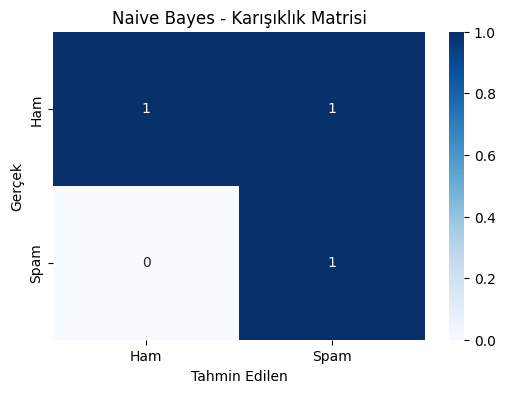

In [6]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Sentetik e-posta veri seti oluşturma
emails = [
    "win free money now click here",
    "hello friend how are you",
    "claim your prize today urgent",
    "meeting tomorrow at 10am",
    "discount offer buy now cheap",
    "project update please review",
    "free gift card click to win",
    "lunch plan today with team",
    "limited time offer act now",
    "happy birthday wish you best"
]
labels = [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]  # 1: Spam, 0: Ham

# Veriyi DataFrame'e dönüştürme
data = pd.DataFrame({'email': emails, 'label': labels})

# Metin verisini sayısal özelliklere dönüştürme
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['email'])
y = data['label']

# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Naive Bayes modelini oluşturma ve eğitme
model = MultinomialNB()
model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = model.predict(X_test)

# Doğruluk skoru ve karışıklık matrisi
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Doğruluk Skoru:", accuracy)
print("Karışıklık Matrisi:\n", conf_matrix)

# Karışıklık matrisini görselleştirme
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Naive Bayes - Karışıklık Matrisi')
plt.savefig('naive_bayes_confusion_matrix.png')

# Yeni e-posta testi
new_emails = ["click to win free prize", "team meeting at 2pm"]
new_emails_transformed = vectorizer.transform(new_emails)
predictions = model.predict(new_emails_transformed)
print("\nYeni E-posta Tahminleri:")
for email, pred in zip(new_emails, predictions):
    print(f"E-posta: {email} -> {'Spam' if pred == 1 else 'Ham'}")

**Knn(K-nearest Neighbors)**

Doğruluk Skoru: 0.7555555555555555
Karışıklık Matrisi:
 [[19  0  0]
 [ 0  7  6]
 [ 0  5  8]]

Yeni Veri Noktası Tahminleri:
Veri: [5. 3.] -> setosa
Veri: [6.  2.5] -> versicolor


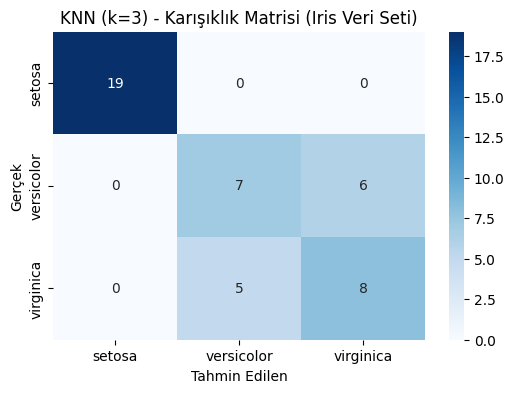

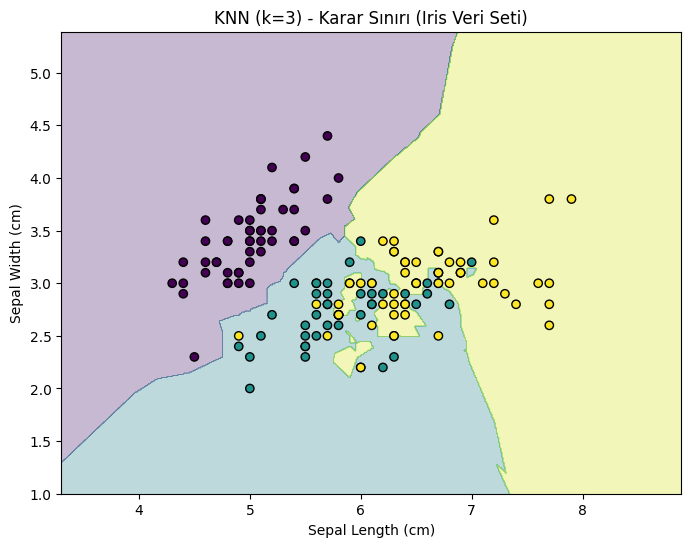

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Iris veri setini yükleme
iris = load_iris()
X = iris.data[:, :2]  # İlk iki özelliği (sepal length, sepal width) kullan
y = iris.target

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# KNN modelini oluşturma ve eğitme
k = 3  # Komşu sayısı
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = model.predict(X_test)

# Doğruluk skoru ve karışıklık matrisi
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Doğruluk Skoru:", accuracy)
print("Karışıklık Matrisi:\n", conf_matrix)

# Karışıklık matrisini görselleştirme
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title(f'KNN (k={k}) - Karışıklık Matrisi (Iris Veri Seti)')
plt.savefig('knn_iris_confusion_matrix.png')

# Karar sınırını görselleştirme
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title(f'KNN (k={k}) - Karar Sınırı (Iris Veri Seti)')
plt.savefig('knn_iris_decision_boundary.png')

# Yeni veri noktası testi
new_data = np.array([[5.0, 3.0], [6.0, 2.5]])  # Örnek yeni veri noktaları
new_predictions = model.predict(new_data)
print("\nYeni Veri Noktası Tahminleri:")
for data, pred in zip(new_data, new_predictions):
    print(f"Veri: {data} -> {iris.target_names[pred]}")